In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [ ]:
# Load diabetes dataset
diabetes = load_diabetes()
print(diabetes)

In [ ]:
# Convert the data into pandas dataframe
my_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)   #If using your own dataset, you would know which columns you need
my_df

In [ ]:
# Add the target--> Value we are trying to predict using the model
my_df["target"] = diabetes.target
my_df


In [ ]:
# Splitting data into a and b datasets: Training and testing datasets
a = my_df.drop("target", axis=1)  # We added target column only to see it. Its the predicted outcome
b = my_df["target"]
a.shape, b.shape


In [7]:
from sklearn.model_selection import train_test_split
# Splitting the data into 80% train and 20% test data
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)


In [ ]:
# Checking the shape of the datasets
print ("Training set shape: ", a_train.shape, b_train.shape)
print ("Testing set shape: ", a_test.shape, b_test.shape)





In [10]:
from sklearn.linear_model import LinearRegression

#Create Linear regression model
lr = LinearRegression()

In [ ]:
# Training the model on the training set--> This is how the model learns how to predict
lr.fit(a_train, b_train)


In [ ]:
# Predict on the testing set
# y_pred is the predicted value based on features the model has learnt from the training above
y_pred = lr.predict(a_test)
y_pred.shape


In [ ]:
# y_pred shape will be equal to b_test shape
b_test.shape

In [17]:
# We need KPIs to measure the performance of the model predictions
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the performance of the model by comparing y_pred and b_test
r2 = r2_score(y_pred, b_test)
mse = mean_squared_error(y_pred, b_test)
mae = mean_absolute_error(y_pred, b_test)
intercept = lr.intercept_

print("R2 score: ", r2) # How well the model fits the data. Higher the better
print("Mean squared error: ", mse) # Root mean sq of the diff between pred and test values. Lower the better
print("Mean absolute error: ", mae) # Mean absolute diff between pred and test values. Lower the better
print("Intercept:", intercept) # y-intercept of the regression line
                               # if y-intercept is +ve, the target increases when the features value increase (diabetes increases with Age)
                               # if y-intercept is -ve, the target decreases when the features value increase (diabetes decreases with Age)


R2 score:  0.00690491583216335
Mean squared error:  2900.193628493482
Mean absolute error:  42.79409467959994
Intercept: 151.34560453985995


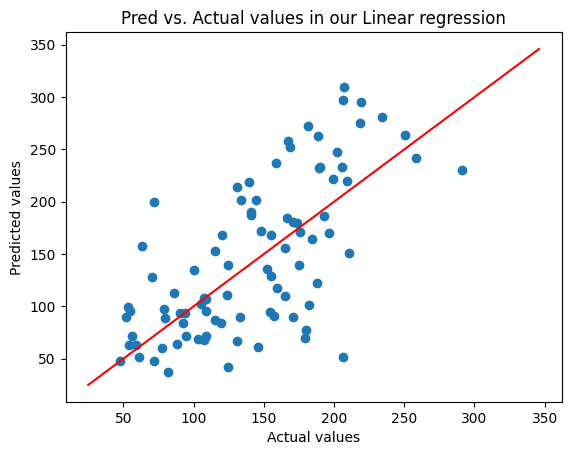

In [18]:
# Plot pred vs. actual test values
# Pred values on x-axis, actual test values on y-axis
# If model is a good fit, the points should be close to the diagonal line
import matplotlib.pyplot as plt
plt.scatter(y_pred, b_test)
plt.plot([b.min(), b.max()], [b.min(), b.max()], color="red") # draw a red line between min and max values of y
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Pred vs. Actual values in our Linear regression")
plt.show()



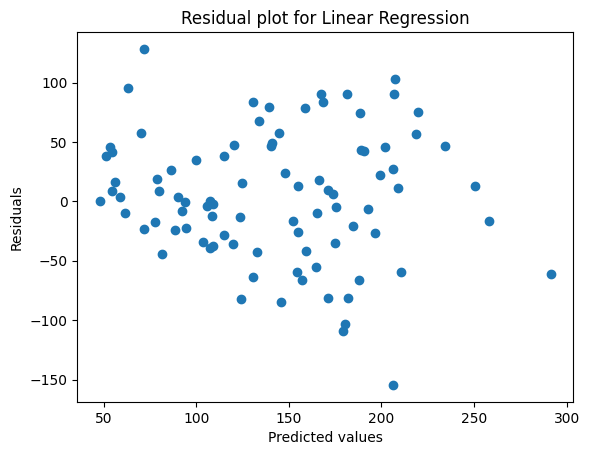

In [20]:
#Plotting the residuals
#Residuals are plotted against the predicted values
# If the linear reg model is a good fit for data
# The residual plot will show a random scatter of points around zero
# With no discernable trend
plt.scatter(y_pred, b_test-y_pred)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot for Linear Regression")
plt.show()